In [1]:
# #| hide
%load_ext autoreload
%autoreload 2

# braga2024datasetname

> Module for handling the loading of bags collected with the INF-UFG car that were previously converted to the Semantic KITTI format.

In [2]:
#| default_exp braga2024datasetname

In [11]:
#| exports
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torch import nn

from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import yaml

from colorcloud.behley2019iccv import SemanticKITTIDataset, ProjectionTransform, SphericalProjection, UnfoldingProjection, ProjectionVizTransform

## Parte 1

In [4]:
#| eval: false
data_path = '/workspace/data/UFG-Dataset-Labaled/'
ds = SemanticKITTIDataset(data_path, ufg_dataset=True)
val_ds = SemanticKITTIDataset(data_path, split='valid', ufg_dataset=True)
test_ds = SemanticKITTIDataset(data_path, split='test', ufg_dataset=True)
print(f'train size:\t{len(ds)}\nval size:\t{len(val_ds)}\ntest size:\t{len(test_ds)}')

train size:	2374
val size:	0
test size:	0


In [5]:
#| eval: false
item = ds[679]
frame = item['frame']
mask = item['mask']
frame, frame.shape

(array([[-4.3508749e+00,  4.3997469e+00, -1.6579949e+00,  2.3529412e-02],
        [-5.0064950e+00,  5.0662694e+00, -1.6443924e+00,  2.3529412e-02],
        [-5.9493732e+00,  6.0225039e+00, -1.6455369e+00,  1.5686275e-02],
        ...,
        [-4.7362103e+01,  5.3158035e+01,  1.1276423e+01,  2.4705882e-01],
        [-1.0994964e+01,  1.2349147e+01,  3.2139866e+00,  5.0980393e-02],
        [-9.4547243e+00,  1.0626677e+01,  3.2838356e+00,  3.1372551e-02]],
       dtype=float32),
 (20503, 4))

In [6]:
item['frame'].shape

(20503, 4)

In [7]:
#| eval: false
label = item['label']
label, label.shape, label.dtype, set(label)

(array([ 9,  9,  9, ...,  0, 15, 15], dtype=uint32),
 (20503,),
 dtype('uint32'),
 {0, 1, 6, 9, 11, 15})

In [8]:
#| eval: false
mask = item['mask']
mask, mask.shape, mask.dtype

(array([ True,  True,  True, ..., False,  True,  True]),
 (20503,),
 dtype('bool'))

## Parte 2

In [9]:
#| eval: false
def plot_projections(img, label):
    fig, axs = plt.subplots(6, 1, figsize=(20,10), layout='compressed')
    for i, (ax, title) in enumerate(zip(axs, ['x', 'y', 'z', 'r', 'd', 'label'])):
        if i < 5:
            ax.imshow(img[:,:,i])
        else:
            ax.imshow(label)
        ax.set_title(title)
        ax.axis('off')

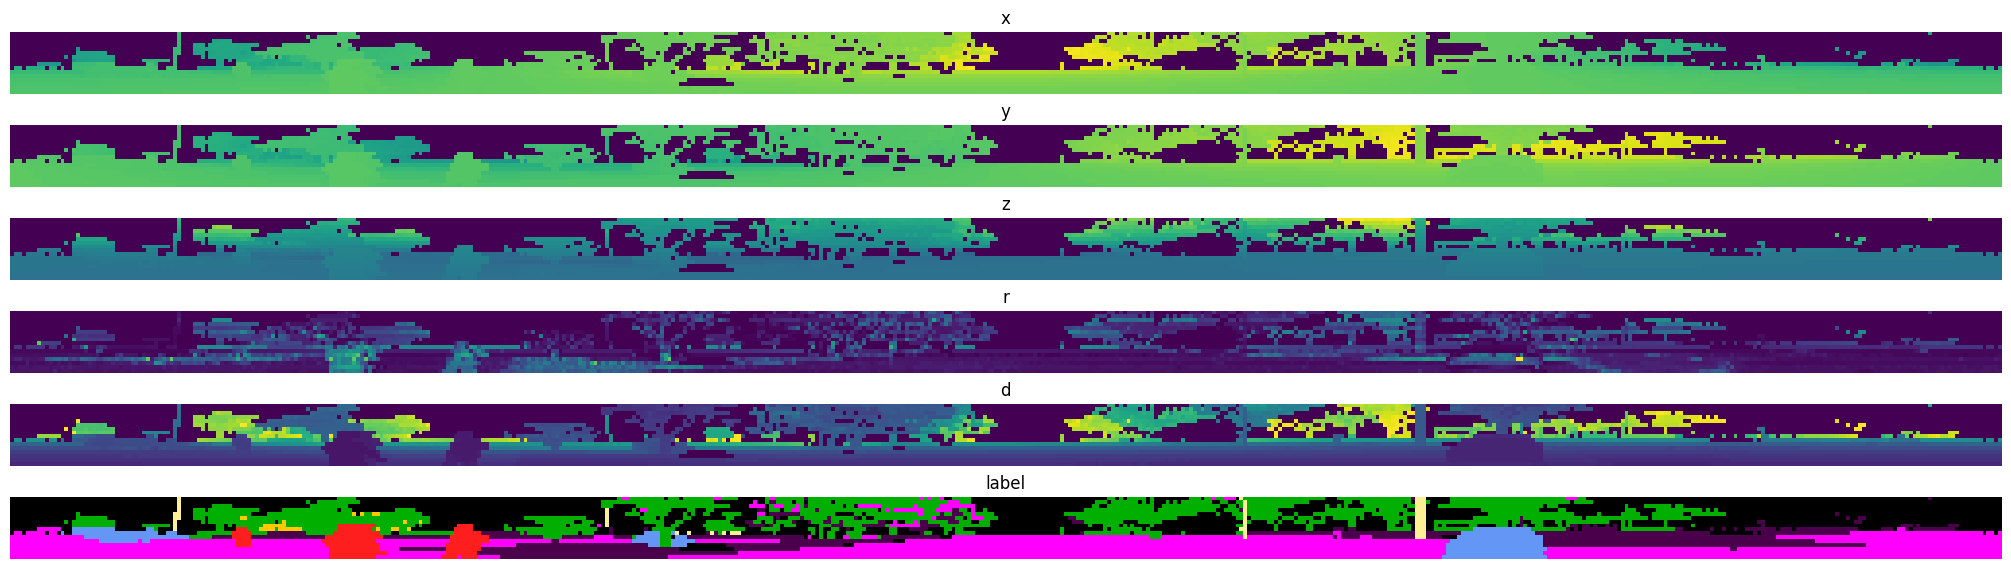

In [13]:
#| eval: false
proj = SphericalProjection(fov_up_deg=16., fov_down_deg=-16., W=512, H=16)  # these values were taken from [https://github.com/PRBonn/semantic-kitti-api/blob/master/auxiliary/laserscan.py]
scaling_values = {
    "x" : {"min": -150., "max":150.},
    "y" : {"min": -150., "max":150.},
    "z" : {"min": -10., "max":30.},
    "r" : {"min": 0., "max":1.},
    "d" : {"min": 0., "max":130.}
}
tfms = v2.Compose([
    ProjectionTransform(proj),
    ProjectionVizTransform(ds.color_map_rgb_np, ds.learning_map_inv_np, scaling_values),
])
ds.set_transform(tfms)
item = ds[0]
img = item['frame']
label = item['label']

plot_projections(img, label)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()